This example demonstrates how to simulate steady channel flow in **20 lines of code!** We recommend using a Python notebook (`.ipynb`) for an interactive experience.

### 1. Define the Geometry and Physics

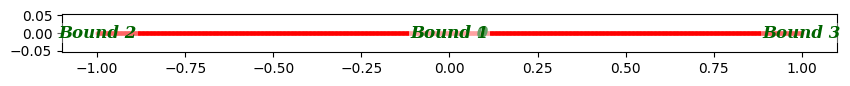

In [89]:
import deepflow as df
df.manual_seed(69)

# Create a 5x1 rectangle
line1 = df.geometry.line_horizontal(y = 0, range_x= [-1, 1])
line2 = df.geometry.line_horizontal(y = 0, range_x= [-1, 1])
point1 = df.geometry.point(x=-1, y=0)
point2 = df.geometry.point(x=1, y=0)
domain = df.domain(line1, line2, point1, point2)#, rectangle2.area_list)
domain.show_setup()

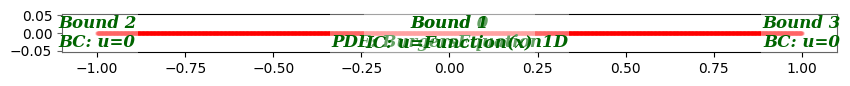

In [90]:
# Define Boundary Conditions
#domain.bound_list[0].define_bc({'u': 0})   # Inflow: u=1
#domain.bound_list[1].define_bc({'u': 1})  # Wall: No slip
#domain.bound_list[2].define_bc({'u': 1})          # Outflow: p=0
#domain.bound_list[3].define_bc({'u': 0})  # Wall: No slip

# Define PDE (Navier-Stokes)
import torch
domain.bound_list[0].define_pde(df.pde.BurgersEquation1D(nu=0.01))
domain.bound_list[1].define_ic({'u':['x', lambda x: -torch.sin(torch.pi * x)]})
domain.bound_list[2].define_bc({'u': 0})
domain.bound_list[3].define_bc({'u': 0})
# Transient Flow
#domain.area_list[0].define_ic({'u': 0})
domain.show_setup()
for geometry in domain:
    geometry.define_time(range_t = [0, 1], sampling_scheme = "random", expo_scaling=True)

### 2. Generate Training Data

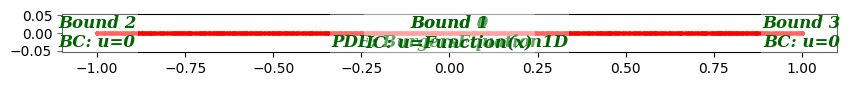

In [91]:
# Sample points: [Left, Bottom, Right, Top], [Interior]
domain.sampling_random([10000,2000,2000,2000])
domain.show_coordinates(display_conditions=True)

### 3. Create and Train the Model

In [92]:
model0 = df.PINN(input_vars=['x', 't'], width=64, length=4)

model1, model1_best = model0.train_adam(
    calc_loss = df.calc_loss_simple(domain),
    learning_rate=0.001,
    epochs=2000
)

Epoch: 1, total_loss: 0.52155, bc_loss: 0.00512, pde_loss: 0.00089, ic_loss: 0.51553
Epoch: 200, total_loss: 0.14394, bc_loss: 0.01374, pde_loss: 0.04495, ic_loss: 0.08525
Epoch: 400, total_loss: 0.09272, bc_loss: 0.00254, pde_loss: 0.03947, ic_loss: 0.05071
Epoch: 600, total_loss: 0.08044, bc_loss: 0.00142, pde_loss: 0.03504, ic_loss: 0.04398
Epoch: 800, total_loss: 0.06752, bc_loss: 0.00115, pde_loss: 0.02843, ic_loss: 0.03795
Epoch: 1000, total_loss: 0.03969, bc_loss: 0.00115, pde_loss: 0.01687, ic_loss: 0.02168
Epoch: 1200, total_loss: 0.02465, bc_loss: 0.00097, pde_loss: 0.01298, ic_loss: 0.01069
Epoch: 1400, total_loss: 0.01848, bc_loss: 0.00070, pde_loss: 0.01064, ic_loss: 0.00714
Epoch: 1600, total_loss: 0.01328, bc_loss: 0.00048, pde_loss: 0.00778, ic_loss: 0.00502
Epoch: 1800, total_loss: 0.00912, bc_loss: 0.00034, pde_loss: 0.00534, ic_loss: 0.00343
Epoch: 2000, total_loss: 0.00639, bc_loss: 0.00017, pde_loss: 0.00387, ic_loss: 0.00235


In [93]:
model2_best = model1_best.train_lbfgs(calc_loss = df.calc_loss_simple(domain), epochs=200)

Epoch: 1998, total_loss: 0.00563, bc_loss: 0.00012, pde_loss: 0.00401, ic_loss: 0.00150
Epoch: 2048, total_loss: 0.00001, bc_loss: 0.00000, pde_loss: 0.00001, ic_loss: 0.00000
Epoch: 2098, total_loss: 0.00000, bc_loss: 0.00000, pde_loss: 0.00000, ic_loss: 0.00000
Epoch: 2148, total_loss: 0.00000, bc_loss: 0.00000, pde_loss: 0.00000, ic_loss: 0.00000


### 4. Visualize Results

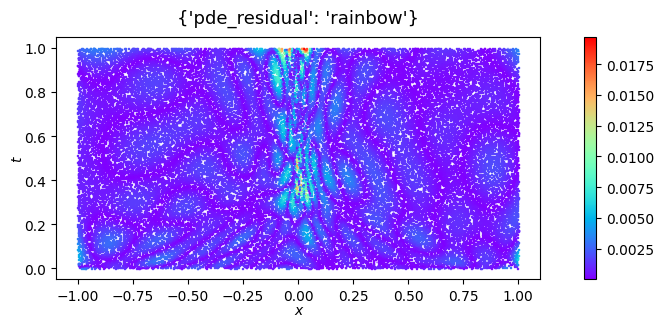

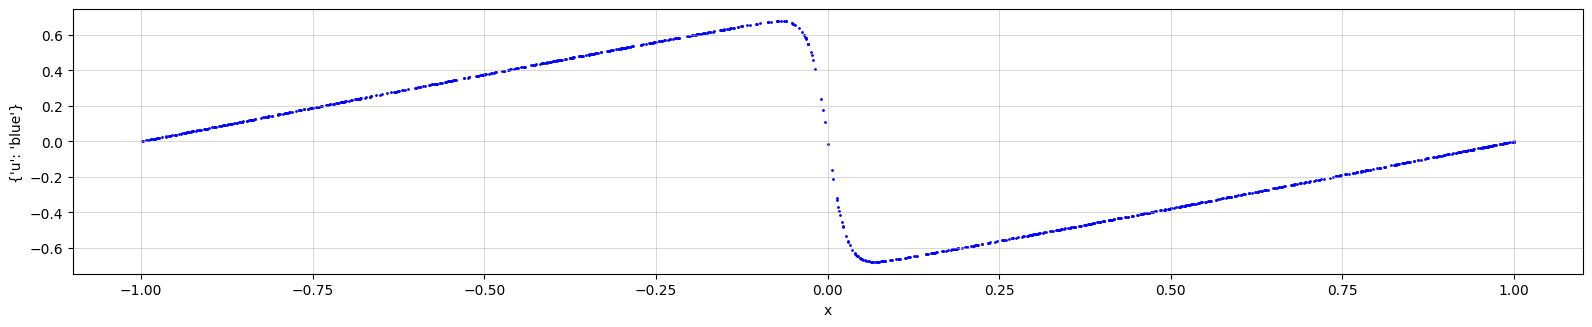

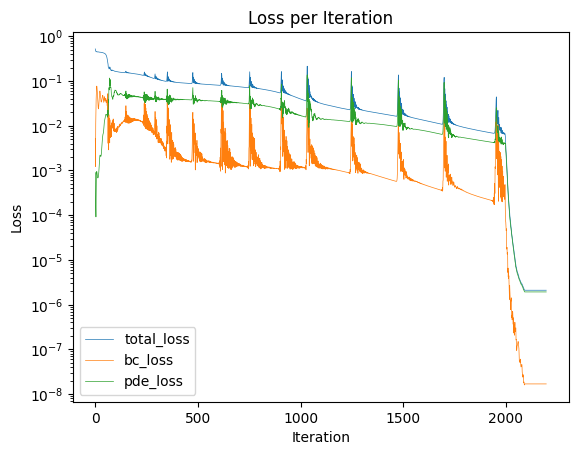

In [98]:
# Evaluate the best model
prediction = domain.bound_list[0].evaluate(model2_best)
prediction.sampling_line(50000, random=True)
prediction.define_time([0,1], sampling_scheme="random")

# Plot Velocity Field
_ = prediction.plot_color({'pde_residual':'rainbow'}, y_axis='t', s=0.5)

prediction.sampling_line(1000, random=True)
prediction.define_time(0.99, sampling_scheme="uniform")
_ = prediction.plot(y_axis={'u':'blue'}, x_axis='x')

# Plot Training Loss
_ =prediction.plot_loss_curve(log_scale=True)

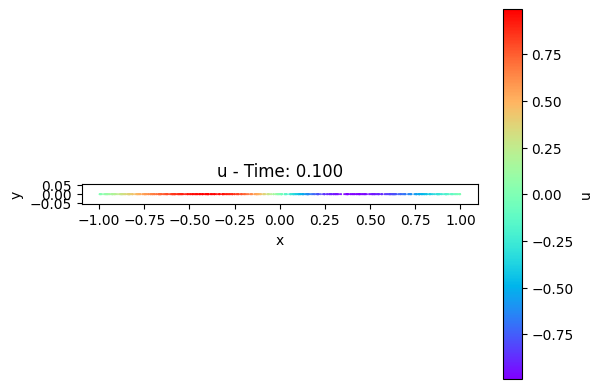

MovieWriter ffmpeg unavailable; using Pillow instead.


In [95]:
a = prediction.plot_animate(color_axis={'u':'rainbow'}, x_axis='x', y_axis='y', range_t=[0.1, 1], dt=0.1, frame_interval=200)
a.save('animation.gif')

In [96]:
print(prediction.geometry.inputs_tensor_dict['t'])

tensor([0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 